In [1]:
from pathlib import Path
import pickle

import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
notebook_path = Path.cwd()
base_dir = notebook_path.parent
data_dir = Path(base_dir, "results")
image_dir = Path(data_dir, "img_crop")
rawdata_dir = Path(data_dir, "raw_data")
data_base_dir = Path(base_dir, "data")

In [3]:
for file in rawdata_dir.iterdir():
    print(file.name)

exp_001_sample1.npy
exp_002_sample1.npy


In [4]:
sample1 = np.load(rawdata_dir / "exp_001_sample1.npy", allow_pickle=True)
sample2 = np.load(rawdata_dir / "exp_002_sample1.npy", allow_pickle=True)

In [5]:
print('sample1:', len(sample1))
print('sample2:', len(sample2))

sample1: 221
sample2: 330


In [6]:
df_sample1 = pd.DataFrame.from_records(sample1)
df_sample2 = pd.DataFrame.from_records(sample2)

In [7]:
df_sample1.tail(5)

,bbox,kps,det_score,landmark_3d_68,pose,landmark_2d_106,gender,age,embedding,object_id,img_crop
216,"[573.3847, 149.30544, 916.45386, 650.19183]","[[687.7821, 335.2349], [844.2058, 343.9257], [...",0.832215,"[[557.5146, 339.49426, 235.42436], [563.5303, ...","[-1.6413056, 9.420531, 3.2368953]","[[755.57886, 655.5052], [571.644, 316.8756], [...",1,30,"[2.2491512, 1.314121, 0.3399121, -1.0526412, 0...",4.0,4.02022-12-12 10:58:24.904381.jpg
217,"[603.1324, 123.74089, 954.419, 644.46155]","[[715.6388, 319.8905], [872.2738, 326.53217], ...",0.882107,"[[581.9735, 327.65594, 252.15305], [587.9844, ...","[-0.27867988, 7.7601333, 3.2061598]","[[780.5127, 650.73694], [597.52216, 300.41556]...",1,34,"[2.4100268, 1.7103853, 0.038154736, -0.9219470...",4.0,4.02022-12-12 10:58:26.171156.jpg
218,"[640.8835, 97.61117, 1013.60834, 641.478]","[[756.8759, 302.58914], [926.33936, 313.91687]...",0.865203,"[[619.38574, 315.37515, 267.2509], [624.7539, ...","[1.506618, 6.939848, 3.8231192]","[[817.1188, 649.209], [640.9095, 281.45224], [...",1,38,"[2.2559345, 1.3595375, 0.025487557, -1.1463057...",4.0,4.02022-12-12 10:58:27.516059.jpg
219,"[695.0942, 69.928276, 1077.1691, 645.1459]","[[813.58673, 288.74597], [996.43945, 305.4983]...",0.766442,"[[667.21826, 303.9586, 279.26566], [673.35175,...","[3.21975, 8.3862295, 3.993509]","[[878.7869, 650.3685], [697.76074, 271.1655], ...",1,28,"[2.563556, 0.99298406, -0.0033031106, -1.17721...",4.0,4.02022-12-12 10:58:28.920076.jpg
220,"[780.4234, 81.871216, 1080.086, 644.80707]","[[896.4899, 277.0086], [1061.2509, 294.30698],...",0.720584,"[[692.4904, 290.71576, 266.0351], [706.10504, ...","[0.2795573, 28.92437, 0.46904337]","[[989.78687, 656.5777], [760.86066, 277.28958]...",1,37,"[1.9839401, 0.11939053, 0.3787807, -0.26097938...",4.0,4.02022-12-12 10:58:30.302365.jpg


In [8]:
df_sample2.tail(5)

,bbox,kps,det_score,landmark_3d_68,pose,landmark_2d_106,gender,age,embedding,object_id,img_crop
325,"[658.9406, 294.34512, 907.79663, 645.2209]","[[759.6423, 424.74316], [872.05524, 435.80875]...",0.793838,"[[634.8815, 440.00494, 151.60716], [641.8935, ...","[6.282014, 23.154322, 3.448265]","[[823.61194, 648.486], [658.96173, 415.5678], ...",1,28,"[1.7888876, 1.7916523, 0.20034382, -1.359467, ...",4.0,4.02022-12-12 11:06:28.247750.jpg
326,"[688.10596, 247.5204, 957.16736, 619.13116]","[[796.88214, 379.83673], [916.90076, 387.4674]...",0.761861,"[[659.7836, 402.84244, 163.99658], [668.85114,...","[7.885587, 25.182676, 2.4373837]","[[870.79407, 621.1459], [687.42566, 377.1793],...",1,26,"[2.0563772, 1.6163929, -0.4275337, -0.975155, ...",4.0,4.02022-12-12 11:06:29.131947.jpg
327,"[721.2294, 169.28584, 1009.7984, 560.3479]","[[839.09204, 302.2722], [967.9908, 311.27524],...",0.776159,"[[690.4276, 328.4829, 172.08736], [700.06885, ...","[10.38859, 26.46179, 3.8147886]","[[919.7844, 564.7583], [718.0448, 302.62662], ...",1,36,"[2.6939514, 1.426732, -1.0033469, -1.5798904, ...",4.0,4.02022-12-12 11:06:30.229086.jpg
328,"[762.3622, 89.37836, 1071.3705, 521.0068]","[[891.49426, 235.48058], [1028.9913, 243.31416...",0.799910,"[[721.40076, 265.26083, 182.92638], [733.0349,...","[10.579102, 27.50517, 2.249196]","[[986.2501, 515.00446], [751.9382, 238.93864],...",1,32,"[2.75186, 1.0778673, -0.01877822, -1.0677866, ...",4.0,4.02022-12-12 11:06:31.146536.jpg
329,"[813.6692, 11.781937, 1091.4387, 478.34787]","[[954.6704, 168.3739], [1055.8466, 165.54263],...",0.735916,"[[739.875, 186.63597, 41.350193], [753.90424, ...","[0.54633737, 47.086464, -4.508204]","[[1055.676, 459.28162], [782.8914, 195.7624], ...",0,43,"[2.01502, 0.936133, -0.52964693, -0.09364238, ...",4.0,4.02022-12-12 11:06:32.100838.jpg


In [9]:
df_sample1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 221 entries, 0 to 220
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   bbox             221 non-null    object 
 1   kps              221 non-null    object 
 2   det_score        221 non-null    float32
 3   landmark_3d_68   221 non-null    object 
 4   pose             221 non-null    object 
 5   landmark_2d_106  221 non-null    object 
 6   gender           221 non-null    int64  
 7   age              221 non-null    int64  
 8   embedding        221 non-null    object 
 9   object_id        221 non-null    float64
 10  img_crop         221 non-null    object 
dtypes: float32(1), float64(1), int64(2), object(7)
memory usage: 18.3+ KB


In [10]:
df_sample1["object_id"] = [int(x) for x in df_sample1["object_id"].values]
df_sample2["object_id"] = [int(x) for x in df_sample2["object_id"].values]

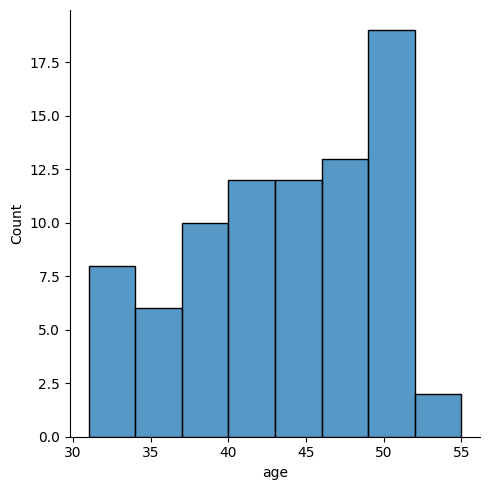

In [11]:
sns.displot(data=df_sample1[df_sample1["object_id"]==1], x="age")

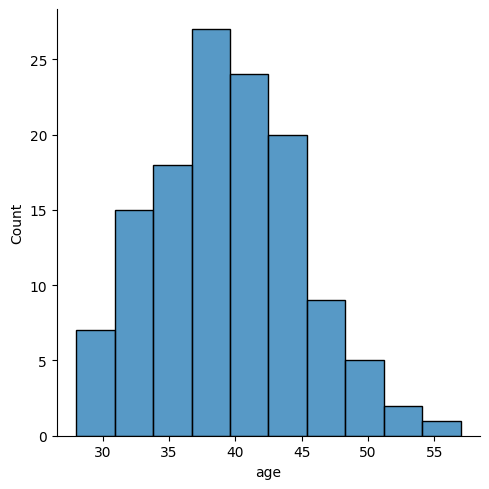

In [12]:
sns.displot(data=df_sample2[df_sample2["object_id"]==1], x="age")

In [12]:
photo_name = df_sample1["img_crop"].values[20]
photo_img = cv2.imread(str(image_dir / photo_name))

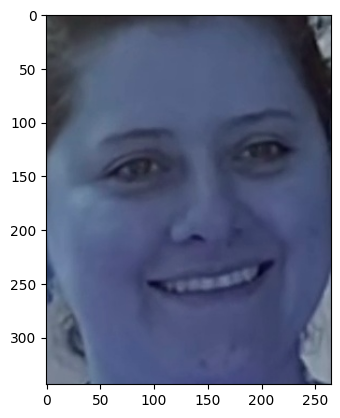

In [13]:
plt.imshow(photo_img)

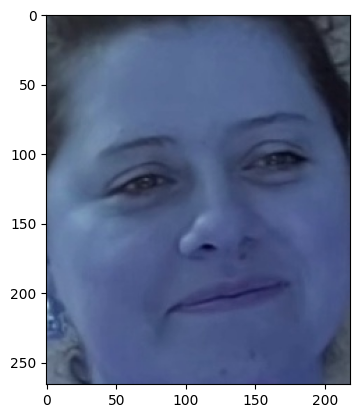

In [14]:
photo_name = df_sample2["img_crop"].values[20]
photo_img = cv2.imread(str(image_dir / photo_name))
plt.imshow(photo_img)

## Feature engineering

In [21]:
def calculate_are(bbox):
    return (bbox[2] - bbox[0]) * (bbox[3] - bbox[1])

In [24]:
df_sample1["area_bbox"] = df_sample1["bbox"].apply(calculate_are)
df_sample2["area_bbox"] = df_sample2["bbox"].apply(calculate_are)

## Embeddings

In [31]:

from sklearn.decomposition import PCA

In [32]:
pca = PCA(n_components=2)
pca.fit([embbeding for embbeding in df_sample1["embedding"].values])

PCA(n_components=2)

In [33]:
for df in [df_sample1, df_sample2]:
    principal_components = pca.transform([embbeding for embbeding in df["embedding"].values])
    df["component_1"] = principal_components[:,0]
    df["component_2"] = principal_components[:,1]

<AxesSubplot: xlabel='component_1', ylabel='component_2'>

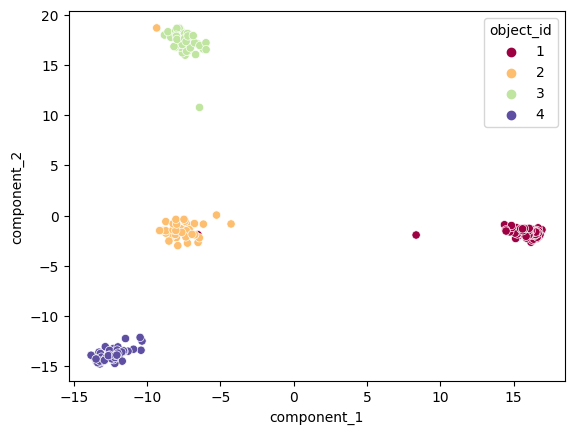

In [34]:
sns.scatterplot(data=df_sample1, x="component_1", y="component_2", hue="object_id", palette="Spectral")

<AxesSubplot: xlabel='component_1', ylabel='component_2'>

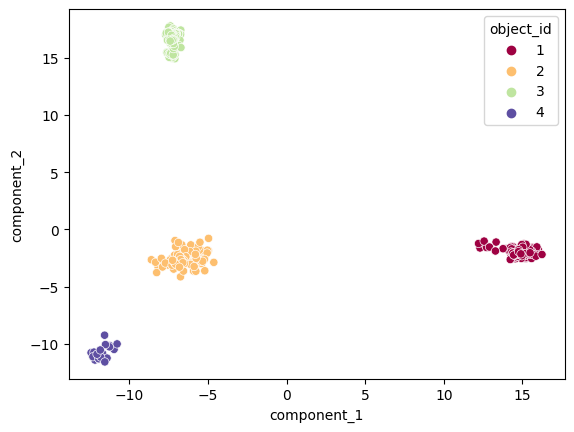

In [35]:
sns.scatterplot(data=df_sample2, x="component_1", y="component_2", hue="object_id", palette="Spectral")

In [36]:
df_sample1["sample"] = 1
df_sample2["sample"] = 2

In [39]:
# all embeddings

use_cols = ["object_id", "component_1", "component_2", "embedding", "area_bbox", "sample"]
df_embeddings = df_sample1[use_cols]
df_embeddings = pd.concat([df_embeddings, df_sample2[use_cols]])

<AxesSubplot: xlabel='component_1', ylabel='component_2'>

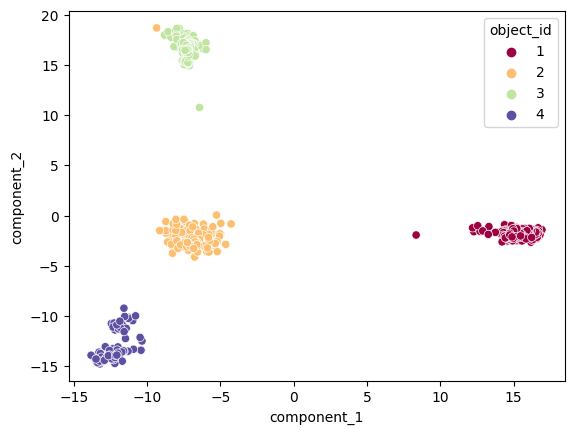

In [40]:
sns.scatterplot(data=df_embeddings, x="component_1", y="component_2", hue="object_id", palette="Spectral")

<AxesSubplot: xlabel='object_id', ylabel='area_bbox'>

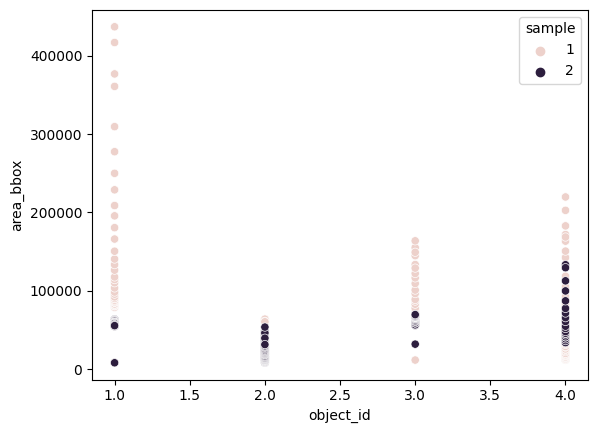

In [42]:
#
sns.scatterplot(data=df_embeddings, x="object_id", y="area_bbox", hue="sample")

<AxesSubplot: xlabel='object_id', ylabel='area_bbox'>

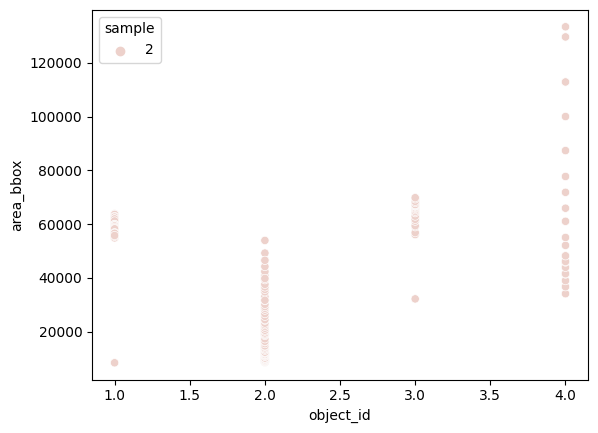

In [44]:
#
sns.scatterplot(data=df_embeddings[df_embeddings["sample"]==2], x="object_id", y="area_bbox", hue="sample")

## Implement the most simple model - mean

In [22]:
from sklearn.metrics.pairwise import cosine_similarity

In [23]:
# create a crm vision DDBB

crm_vision = df_sample1.groupby("object_id")["embedding"].mean().reset_index()

In [29]:
crm_vision["name"] = ["Jhohana", "Geraldin", "Julian", "Cristian"]
crm_vision["type_client"] = ["Descuentos", "Implusivo", "Nuevo", "Leal"]
crm_vision["recomendation"] = ["Salud y Belleza", "Novedades Moda Textil", "Deportes", "Tecnologia"]
crm_vision["descount"] = ["20% marcas de belleza", "20% ultimo lanzamiento", "15% articulos deportivos", "10% laptops"]
crm_vision["last_visit"] = ["30 dias", "40 dias", "No registra", "10 dias"]
crm_vision["created_date"] = ["2022-12-12"] * 4

In [30]:
crm_vision["embedding"]
crm_vision[["object_id", "embedding", "created_date"]].to_pickle(data_base_dir / "crm_vision_auto.csv")
crm_vision.drop(["embedding", "created_date"], axis=1).to_pickle(data_base_dir / "crm_vision_info_client.csv")

In [31]:
crm_vision["embedding"] = [list(embedding) for embedding in crm_vision["embedding"]]

In [40]:
crm_vision_dict = crm_vision[["object_id", "embedding", "created_date"]].to_dict()
crm_vision_info_dict = crm_vision.drop(["embedding", "created_date"], axis=1)

In [49]:
# save dict in pickle format
with open(str(data_base_dir) + "/crm_vision_auto.pickle", 'wb') as handle:
    pickle.dump(crm_vision_dict, handle, protocol=pickle.HIGHEST_PROTOCOL)

with open(str(data_base_dir) + "/crm_vision_info_client.pickle", 'wb') as handle:
    pickle.dump(crm_vision_dict, handle, protocol=pickle.HIGHEST_PROTOCOL)


In [32]:
# save in pickle format

crm_vision[["object_id", "embedding", "created_date"]].to_csv(data_base_dir / "crm_vision_auto.pkl")
crm_vision.drop(["embedding", "created_date"], axis=1).to_csv(data_base_dir / "crm_vision_info_client.pkl")

In [58]:
def calculate_cosine_similarity(matrix_input, matrix_crm):
    return cosine_similarity(
        matrix_input,
        matrix_crm
    )

def _predict(crm_vision_matrix, matrix_input):
    
    #calculate distance
    matrix_similarity = calculate_cosine_similarity(
        matrix_input,
        crm_vision_matrix
    )
    
    score = matrix_similarity.max(axis=1)
    arg_max = matrix_similarity.argmax(axis=1)
    
    # get object_id
    predictions = []
    for max_value in arg_max:
        predictions.append(crm_vision["object_id"].values[max_value])
    
    return predictions, score


def predict(crm_vision, df, distance_treshold=0.8):
    
    # matrix crm vision
    crm_vision_matrix = [embbeding for embbeding  in crm_vision["embedding"].values]
    
    # transform embeddings
    df_predict = df.groupby("object_id")["embedding"].mean().reset_index()
    matrix_input = [embbeding for embbeding  in df_predict["embedding"].values]
    
    predictions, score = _predict(crm_vision_matrix, matrix_input)
    
    df_predict["prediction_object_id"] = predictions
    df_predict["score"] = score
    
    return df_predict

In [61]:
df_predictions = predict(crm_vision, df_sample2)

In [62]:
df_predictions

,object_id,embedding,prediction_object_id,score
0,1,"[-0.7464284, 1.2898444, 0.05075279, -0.8919202...",1,0.963133
1,2,"[-0.062011566, 0.58933794, -0.42598522, 0.2238...",2,0.808246
2,3,"[-0.5675279, 1.4689395, 0.07360604, 1.6746926,...",3,0.874540
3,4,"[1.8825661, 1.5779626, -0.4519711, -0.98838186...",4,0.845507


In [63]:
df_predictions["result"] = df_predictions[["object_id", "prediction_object_id"]].apply(
    lambda x: "correct" if x[0]==x[1] else "incorrect", axis=1
)

<AxesSubplot: xlabel='object_id', ylabel='score'>

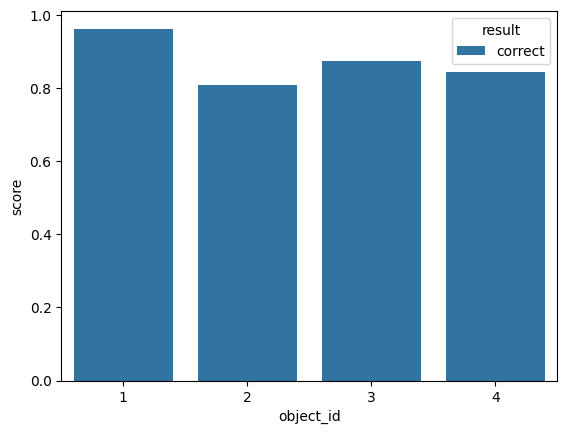

In [64]:
sns.barplot(data=df_predictions, x="object_id", y="score", hue="result")

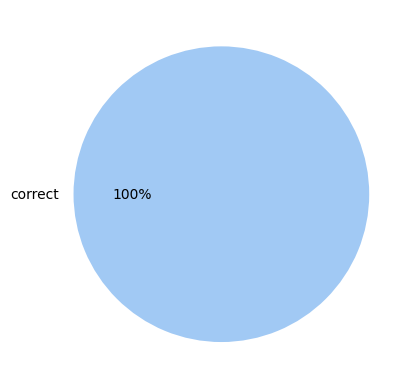

In [65]:
pie_data = df_predictions["result"].value_counts().reset_index()
colors = sns.color_palette('pastel')

plt.pie(x=pie_data["result"], labels = pie_data["index"], colors = colors, autopct='%.0f%%')

plt.show()

In [32]:
df_predictions

,object_id,embedding,prediction_object_id,score,result
0,1,"[-0.7464284, 1.2898444, 0.05075279, -0.8919202...",1,0.963133,correct
1,2,"[-0.062011566, 0.58933794, -0.42598522, 0.2238...",2,0.808246,correct
2,3,"[-0.5675279, 1.4689395, 0.07360604, 1.6746926,...",3,0.874540,correct
3,4,"[1.8825661, 1.5779626, -0.4519711, -0.98838186...",4,0.845507,correct


In [33]:
threshold = 0.85
df_predictions["prediction_object_id_"] = [
    raw_prediction if score>threshold else "no identify" for raw_prediction, score in df_predictions[["prediction_object_id", "score"]].values
]

In [66]:
df_predictions

,object_id,embedding,prediction_object_id,score,result
0,1,"[-0.7464284, 1.2898444, 0.05075279, -0.8919202...",1,0.963133,correct
1,2,"[-0.062011566, 0.58933794, -0.42598522, 0.2238...",2,0.808246,correct
2,3,"[-0.5675279, 1.4689395, 0.07360604, 1.6746926,...",3,0.874540,correct
3,4,"[1.8825661, 1.5779626, -0.4519711, -0.98838186...",4,0.845507,correct


## Notifications

In [72]:
import cv2
import matplotlib.pyplot as plt

In [70]:
crm_vision[crm_vision["name"]=="Jhohana"]

,object_id,embedding,name,type_client,recomendation,descount,last_visit,created_date
0,1,"[-0.76854336, 1.132852, 0.048496965, -0.935878...",Jhohana,Descuentos,Salud y Belleza,20% marcas de belleza,30 dias,2022-12-12


In [78]:
front_image = np.zeros((840, 640*2, 3))
front_image[:, :, :] = (0,191,255)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


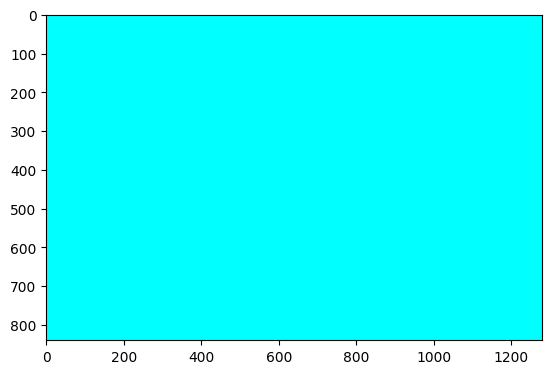

In [79]:
plt.imshow(front_image)

In [205]:
def generate_notification(face, df_info):
    
    img_notification = np.zeros((210, 640, 3)).astype(np.uint8)
    img_notification[:, :, :] = (0,191,255)

    width = 100
    height = 100

    cv2.putText(img_notification, df_info["name"][0], (30, 35), cv2.FONT_HERSHEY_SIMPLEX,
        1, (255, 10, 58), 2)
    cv2.putText(img_notification, "se encuentra", (25, 175), cv2.FONT_HERSHEY_SIMPLEX,
            0.8, (255, 10, 58), 2)
    cv2.putText(img_notification, "en la tienda", (25, 195), cv2.FONT_HERSHEY_SIMPLEX,
            0.8, (255, 10, 58), 2)

    cv2.putText(img_notification, "Tipo Cliente: ", (250, 30), cv2.FONT_HERSHEY_SIMPLEX,
            0.5, (255, 10, 58), 2)
    cv2.putText(img_notification, df_info["type_client"][0], (380, 30), cv2.FONT_HERSHEY_SIMPLEX,
            0.8, (58, 10, 255), 2)

    cv2.putText(img_notification, "Recomendar: ", (250, 80), cv2.FONT_HERSHEY_SIMPLEX,
            0.5, (255, 10, 58), 2)
    cv2.putText(img_notification, df_info["recomendation"][0], (380, 80), cv2.FONT_HERSHEY_SIMPLEX,
            0.8, (58, 10, 255), 2)

    cv2.putText(img_notification, "Descuento: ", (250, 130), cv2.FONT_HERSHEY_SIMPLEX,
            0.5, (255, 10, 58), 2)
    cv2.putText(img_notification, df_info["descount"][0], (380, 130), cv2.FONT_HERSHEY_SIMPLEX,
            0.8, (58, 10, 255), 2)

    cv2.putText(img_notification, "Ultima visita: ", (250, 180), cv2.FONT_HERSHEY_SIMPLEX,
            0.5, (255, 10, 58), 2)
    cv2.putText(img_notification, df_info["last_visit"][0], (380, 180), cv2.FONT_HERSHEY_SIMPLEX,
            0.8, (58, 10, 255), 2)

    cv2.line(img_notification, (0, 205), (640, 205), (0, 0, 0), 2) 

    cropped_face = cv2.resize(face, (width, height))
    img_notification[50:50+height, 50:50+width] = cropped_face
    
    return (img_notification, df_info["object_id"][0])

In [239]:
df_info = crm_vision[crm_vision["name"]=="Jhohana"]

In [240]:
img, id_object = generate_notification(photo_img, df_info)

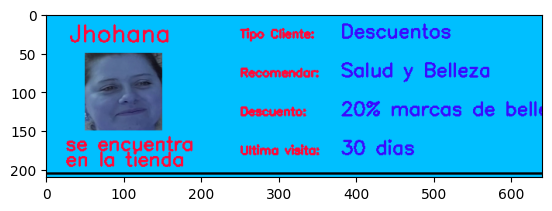

In [241]:
plt.imshow(img)

In [256]:
class NotificationManager:
    def __init__(self):
        self.showing_ids = []
        self.front_notification = np.zeros((840, 640, 3)).astype(np.uint8)
        self.front_notification[:, :, :] = (0,191,255)
        
        self.height_img_notification = 210
        self.width_img_notification = 640
    
    def _generate_notification(self, face, df_info):
        img_notification = np.zeros(
            (self.height_img_notification, self.width_img_notification, 3)).astype(np.uint8)
        img_notification[:, :, :] = (0,191,255)

        width = 100
        height = 100

        cv2.putText(img_notification, df_info["name"].values[0], (30, 35), cv2.FONT_HERSHEY_SIMPLEX,
            1, (255, 10, 58), 2)
        cv2.putText(img_notification, "se encuentra", (25, 175), cv2.FONT_HERSHEY_SIMPLEX,
                0.8, (255, 10, 58), 2)
        cv2.putText(img_notification, "en la tienda", (25, 195), cv2.FONT_HERSHEY_SIMPLEX,
                0.8, (255, 10, 58), 2)

        cv2.putText(img_notification, "Tipo Cliente: ", (250, 30), cv2.FONT_HERSHEY_SIMPLEX,
                0.5, (255, 10, 58), 2)
        cv2.putText(img_notification, df_info["type_client"].values[0], (380, 30), cv2.FONT_HERSHEY_SIMPLEX,
                0.8, (58, 10, 255), 2)

        cv2.putText(img_notification, "Recomendar: ", (250, 80), cv2.FONT_HERSHEY_SIMPLEX,
                0.5, (255, 10, 58), 2)
        cv2.putText(img_notification, df_info["recomendation"].values[0], (380, 80), cv2.FONT_HERSHEY_SIMPLEX,
                0.8, (58, 10, 255), 2)

        cv2.putText(img_notification, "Descuento: ", (250, 130), cv2.FONT_HERSHEY_SIMPLEX,
                0.5, (255, 10, 58), 2)
        cv2.putText(img_notification, df_info["descount"].values[0], (380, 130), cv2.FONT_HERSHEY_SIMPLEX,
                0.8, (58, 10, 255), 2)

        cv2.putText(img_notification, "Ultima visita: ", (250, 180), cv2.FONT_HERSHEY_SIMPLEX,
                0.5, (255, 10, 58), 2)
        cv2.putText(img_notification, df_info["last_visit"].values[0], (380, 180), cv2.FONT_HERSHEY_SIMPLEX,
                0.8, (58, 10, 255), 2)

        cv2.line(img_notification, (0, 205), (640, 205), (0, 0, 0), 2) 

        cropped_face = cv2.resize(face, (width, height))
        img_notification[50:50+height, 50:50+width] = cropped_face

        return img_notification
    
    def generate_notification(self, face, df_info):
        
        id_object = df_info["object_id"].values[0]
        
        if id_object in self.showing_ids:
            return self.front_notification
        
        img = self._generate_notification(face, df_info)
        
        ocupated_spaces = len(self.showing_ids)
        
        # insert notification
        
        initital_pos = ocupated_spaces * self.height_img_notification
        print(initital_pos)
        self.front_notification[initital_pos:initital_pos+self.height_img_notification] = img
        
        self.showing_ids.append(id_object)
        
        return self.front_notification
    

In [260]:
notification_manager = NotificationManager()

In [261]:
df_info = crm_vision[crm_vision["name"]=="Jhohana"]
notifications_front = notification_manager.generate_notification(photo_img, df_info)

0


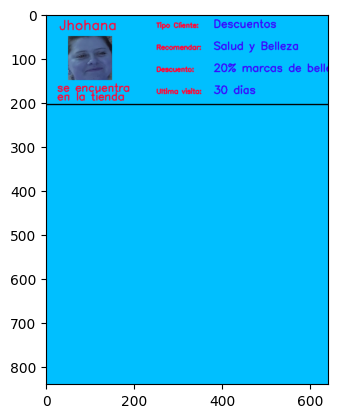

In [262]:
plt.imshow(notifications_front)

In [263]:
df_info = crm_vision[crm_vision["name"]=="Cristian"]
notifications_front = notification_manager.generate_notification(photo_img, df_info)

210


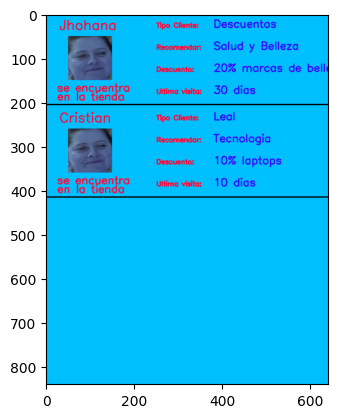

In [264]:
plt.imshow(notifications_front)

In [269]:
df_sample2[df_sample2["object_id"]==2]["img_crop"].sample(1).values[0]

'2.02022-12-12 11:03:49.781054.jpg'